In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary libraries
import os

# Remove sample_data directory if you want a clean workspace
!rm -r ./sample_data

# Clone GitHub files to Colab workspace
repo_name = "Assignment_3_InterpretableML"  # Your repo name
git_path = 'https://github.com/Antara999333/Assignment_3_InterpretableML.git'  # Your repository link
!git clone "{git_path}"

# If you have a requirements.txt file, uncomment the following line to install dependencies
# !pip install -r "{os.path.join(repo_name, 'requirements.txt')}"

# Change working directory to the location of your notebook (adjust if necessary)
# Assuming your notebook is directly in the repo root
%cd "{repo_name}"
%ls


Cloning into 'Assignment_3_InterpretableML'...
/content/Assignment_3_InterpretableML


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
# List all the column names
print(data.columns)

# Get a summary of the DataFrame
print(data.info())


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   obj

# Question 1 - Exploratory analysis and assumptions about linear logistic and GAM models.


# Assumption for Linear Model -
Linear models assume a linear relationship between the predictor variables and the response variable

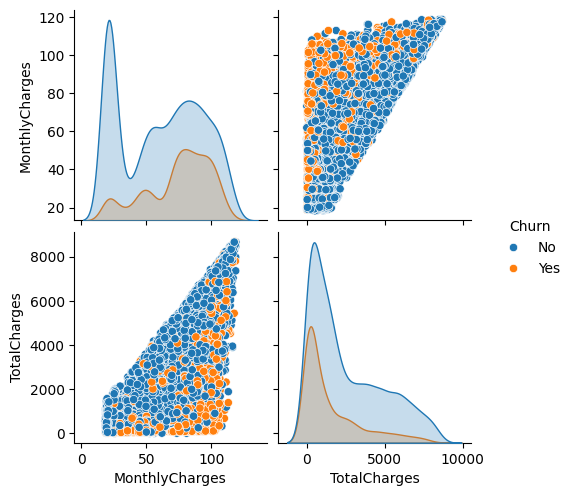

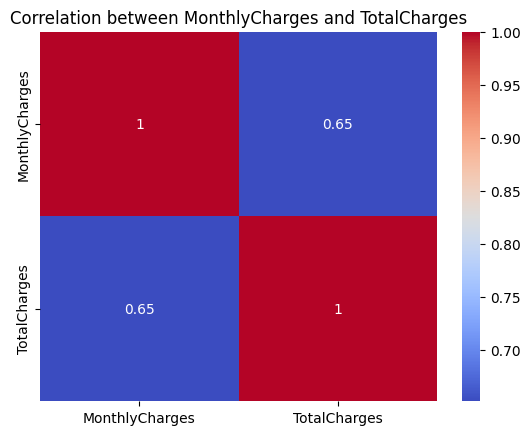

In [ ]:
# Scatter plot to check linearity
sns.pairplot(data[['MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

# Correlation matrix (check for linear relationships)
sns.heatmap(data[['MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between MonthlyCharges and TotalCharges")
plt.show()


# Assumptions for Logistic Regression

# 1. Binary outcome assumption - This assumption is met because the outcome (churn) is either yes or no

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric (handle missing values)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Basic info
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Linearity of Continuous Variables and Log Odds

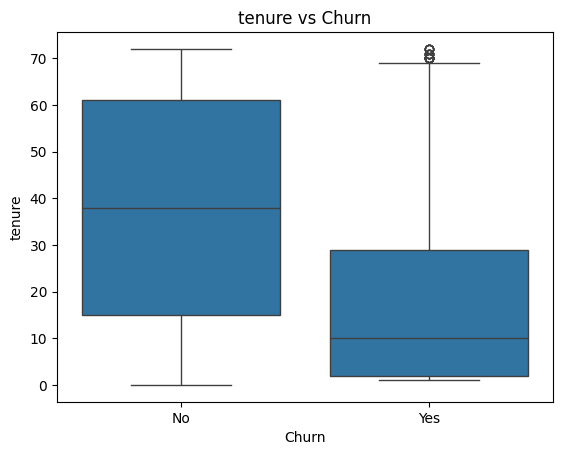

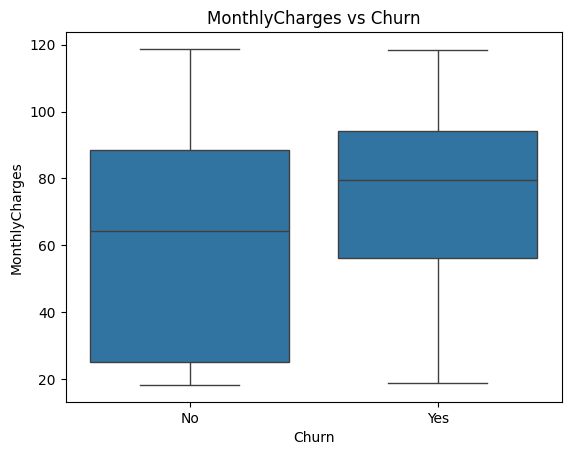

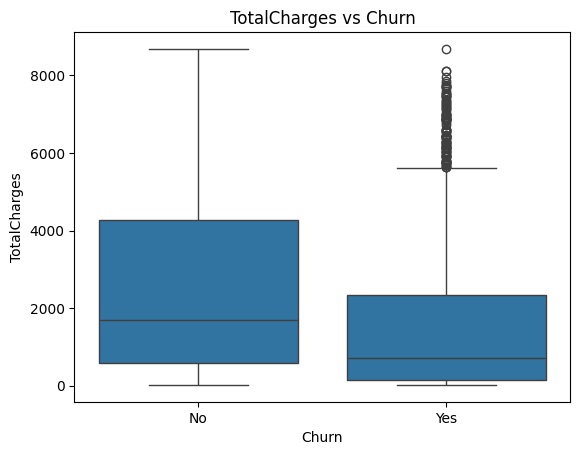

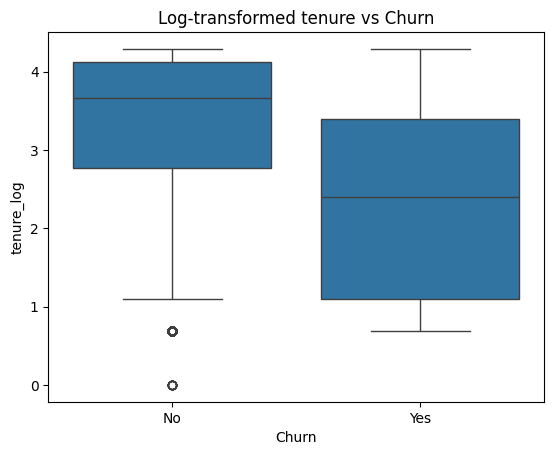

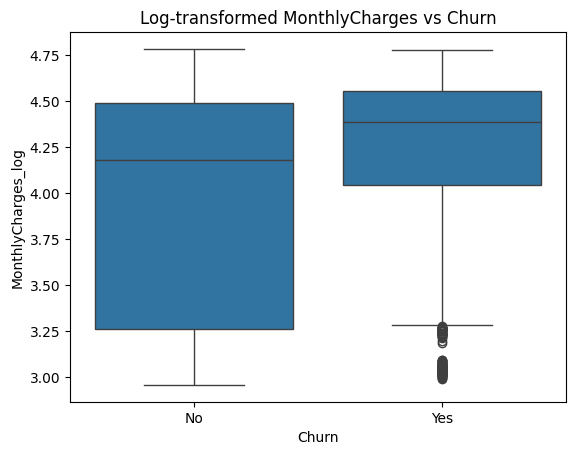

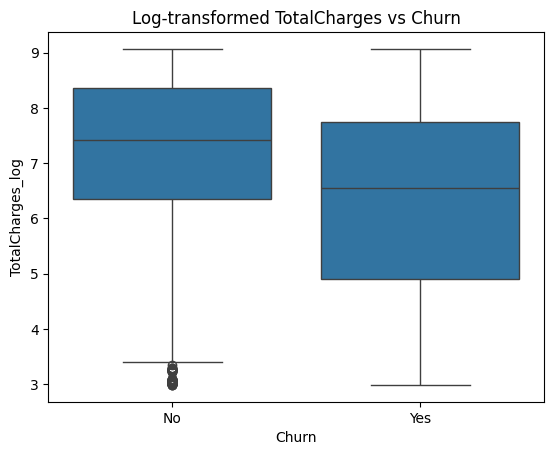

In [ ]:
# Check the relationship between continuous variables and churn
continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create boxplots for continuous variables against churn
for var in continuous_vars:
    sns.boxplot(x='Churn', y=var, data=data)
    plt.title(f'{var} vs Churn')
    plt.show()

# You can also log-transform continuous variables for checking linearity
for var in continuous_vars:
    data[var + '_log'] = np.log(data[var] + 1)  # log transformation to handle zeros
    sns.boxplot(x='Churn', y=var + '_log', data=data)
    plt.title(f'Log-transformed {var} vs Churn')
    plt.show()


# 3. Multicollinearity

Feature       VIF
0  tenure  6.332432
1  MonthlyCharges  3.361075
2  TotalCharges  8.079181

This shows moderate multicollinearity


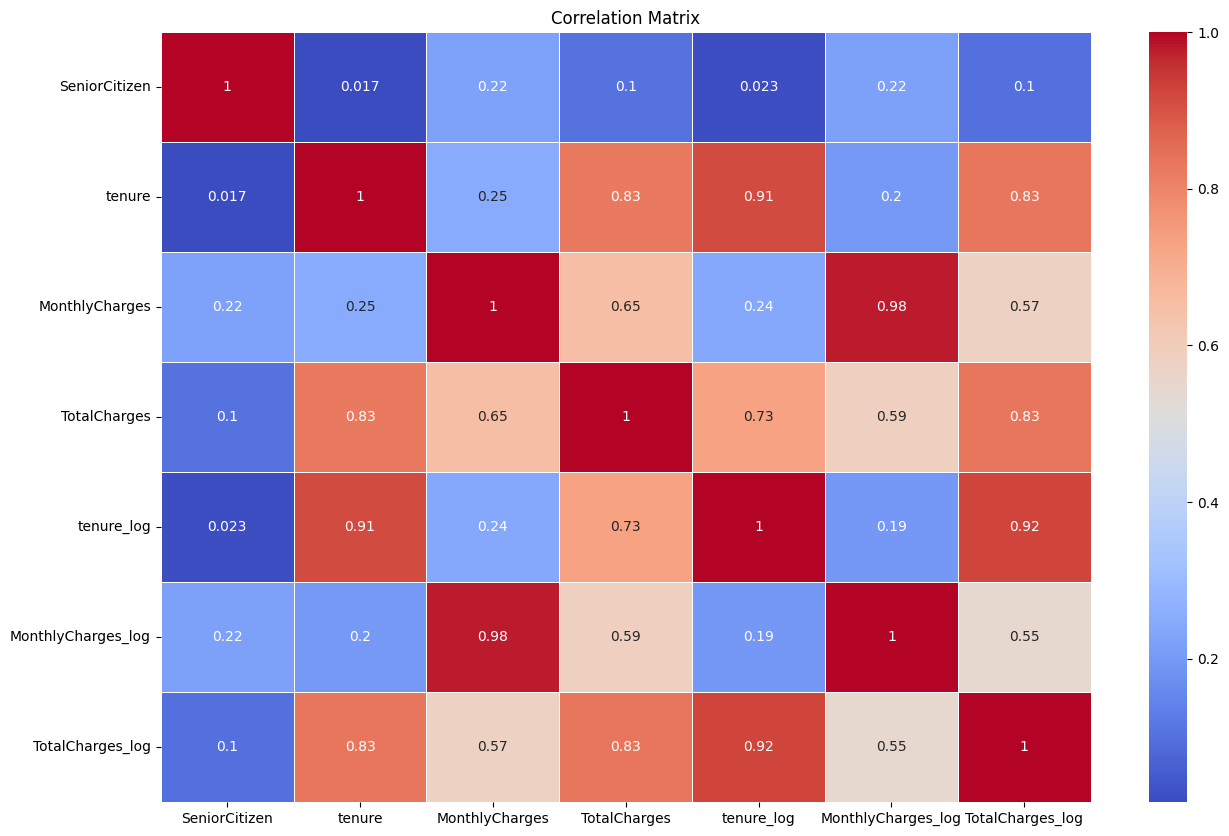

          Feature       VIF
0          tenure  6.332432
1  MonthlyCharges  3.361075
2    TotalCharges  8.079181


In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Calculate VIF for continuous variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use numeric columns except the target variable for VIF calculation
X = numeric_data[['tenure', 'MonthlyCharges', 'TotalCharges']].dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


# Assumptions for GAM

In [ ]:
pip install pygam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


Missing values in features:
tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64
Missing values in target:
0
Infinite values in features:
tenure            True
MonthlyCharges    True
TotalCharges      True
dtype: bool


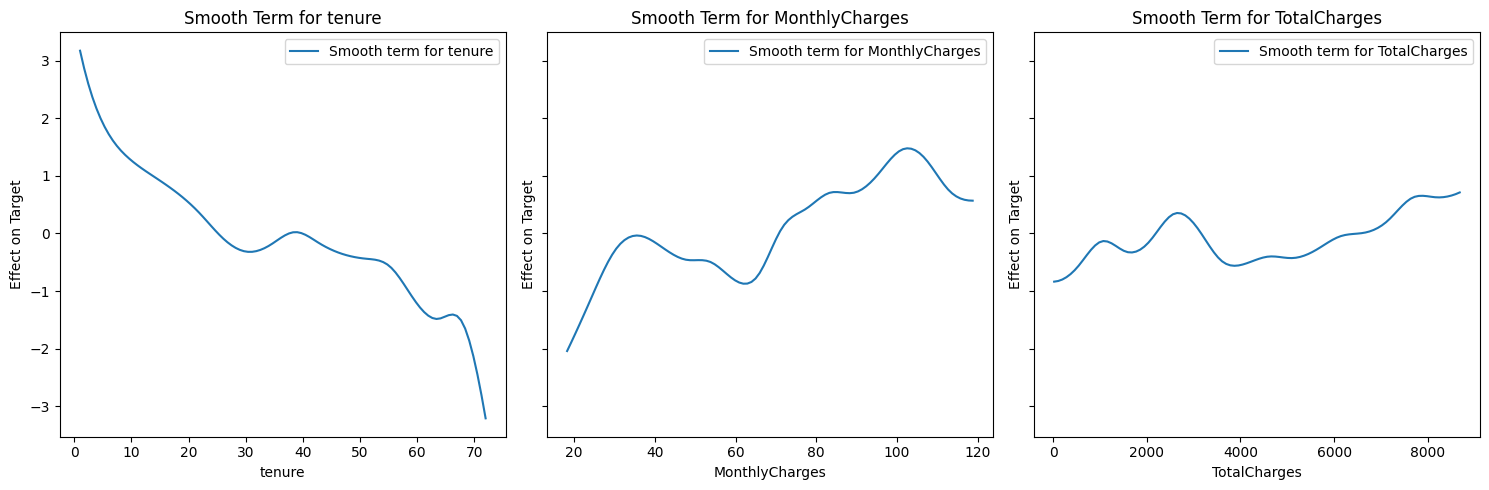

In [ ]:
from pygam import LogisticGAM, s
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Convert categorical columns to numerical if necessary
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    data[col] = data[col].astype('category').cat.codes

# Prepare features and target variable
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

# Check for missing values
print("Missing values in features:")
print(X.isna().sum())

print("Missing values in target:")
print(y.isna().sum())

# Remove rows with missing values
X = X.dropna()
y = y.loc[X.index]  # Ensure y is aligned with X

# Check for infinite values
print("Infinite values in features:")
print(np.isfinite(X).all())

# Fit a GAM model
gam = LogisticGAM(s(0) + s(1) + s(2)).fit(X, y)

# Plot smooth functions for each predictor
fig, axs = plt.subplots(1, X.shape[1], figsize=(15, 5), sharey=True)
for i in range(X.shape[1]):
    XX = gam.generate_X_grid(term=i)
    axs[i].plot(XX[:, i], gam.partial_dependence(term=i, X=XX), label=f'Smooth term for {X.columns[i]}')
    axs[i].set_title(f'Smooth Term for {X.columns[i]}')
    axs[i].set_xlabel(X.columns[i])
    axs[i].set_ylabel('Effect on Target')
    axs[i].legend()
plt.tight_layout()
plt.show()


# Question 2 - Linear Regression

---



In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

# Convert TotalCharges to numeric, coercing errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
data = data.dropna(subset=['TotalCharges'])

# Convert the target variable 'Churn' to binary
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define feature variables (X) and target variable (y)
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous predictions to binary (threshold = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Interpret the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 0.14593552097785367
R^2 Score: 0.25221407931758144
Accuracy: 0.7917555081734187
F1 Score: 0.556732223903177
                                       Coefficient
SeniorCitizen                             0.020068
tenure                                   -0.046345
MonthlyCharges                           -0.110873
TotalCharges                             -0.102989
gender_Male                              -0.001845
Partner_Yes                               0.003522
Dependents_Yes                           -0.013029
PhoneService_Yes                          0.006340
MultipleLines_No phone service           -0.006340
MultipleLines_Yes                         0.033792
InternetService_Fiber optic               0.135763
InternetService_No                       -0.013794
OnlineSecurity_No internet service       -0.013794
OnlineSecurity_Yes           

# Interpretation of Linear Regression Model
The regression model definitely has room for improvement.  It has a Mean Squared Error (MSE) of 0.1459, indicating the average squared difference between predicted and actual values. The R² score of 0.252 suggests that only 25.2% of the variance in the target variable is explained by the model. This shows relatively low predictive power. The accuracy is 79.18% meaning that 79.18% of the predictions are correct.The F1 score of 0.556 shows a moderate balance between precision and recall in identifying churn. The coefficients highlight key features, with InternetService_Fiber optic, StreamingMovies_Yes, and StreamingTV_Yes having the strongest positive impacts on churn. The high MSE and low  R² show that that the model cannot very well capture the variability in the data.

Question 3 Logistic regression

In [ ]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric, coercing errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
data = data.dropna(subset=['TotalCharges'])

# Convert the target variable 'Churn' to binary
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define feature variables (X) and target variable (y)
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
y_pred_binary = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc}")

# Interpret the coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.7867803837953091
F1 Score: 0.5626822157434401
Confusion Matrix:
[[914 119]
 [181 193]]
ROC AUC Score: 0.8319494126965228
                                       Coefficient
SeniorCitizen                             0.094951
tenure                                   -1.440697
MonthlyCharges                           -0.641328
TotalCharges                              0.689707
gender_Male                              -0.015803
Partner_Yes                               0.024898
Dependents_Yes                           -0.099481
PhoneService_Yes                         -0.028912
MultipleLines_No phone service            0.028912
MultipleLines_Yes                         0.161763
InternetService_Fiber optic               0.654429
InternetService_No                       -0.074440
OnlineSecurity_No internet service       -0.074440
OnlineSecurity_Yes      

# Intepretation of Logistic Regression model
The logistic regression model shows a good ability to predict customer churn with 78.7% accuracy and a moderate F1 score of 0.563, balancing precision and recall. The confusion matrix highlights that it performs better at predicting no-churn cases, with more false negatives (181) than false positives (119). A strong ROC AUC score of 0.832 indicates that the model effectively distinguishes between churn and no-churn cases. Feature interpretation reveals that longer tenure reduces churn likelihood, while being a senior citizen and having fiber optic service increases the probability of churn, providing valuable insights for targeted interventions.

Question 4 GAM

In [ ]:
!pip install pygam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.8102224325603408
AUC: 0.7304411661493391


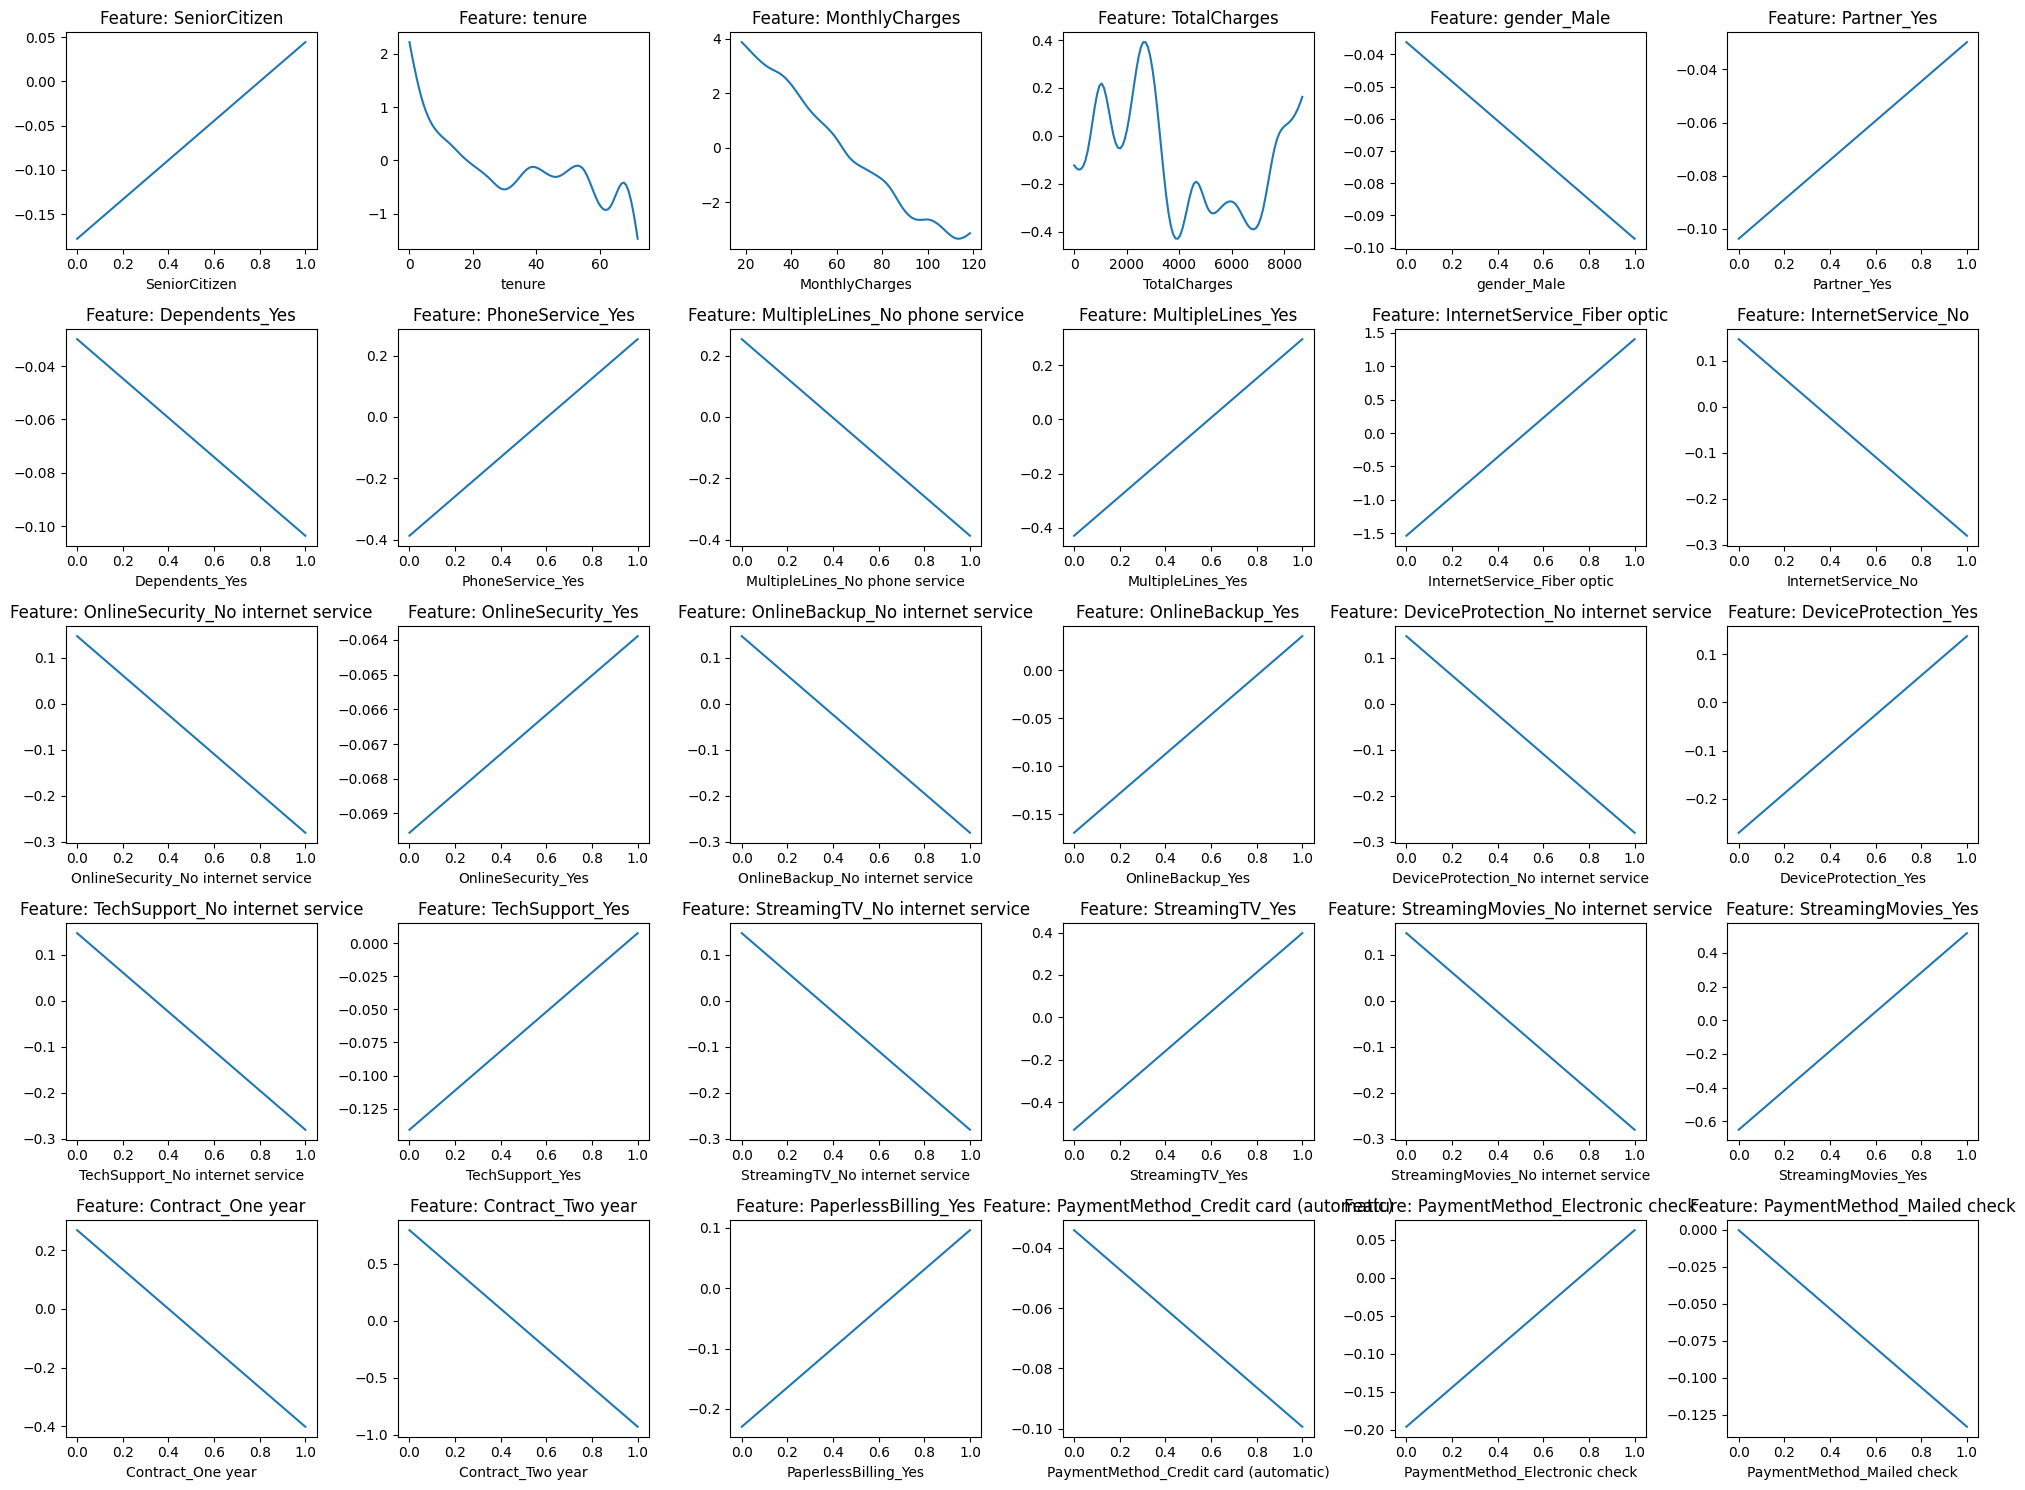

In [ ]:
# Step 1: Import Libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from pygam import LogisticGAM, s
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing
# Convert 'TotalCharges' to numeric, forcing errors to NaN and then fill NaNs
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Convert categorical columns to dummy variables
data_encoded = pd.get_dummies(data.drop(['customerID', 'Churn'], axis=1), drop_first=True)

# Map 'Churn' to binary values
data_encoded['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Separate features and target variable
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build and Fit the GAM Model with Specified Splines
num_features = X_train.shape[1]

# Initialize the GAM model with splines for each feature
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) +
                  s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) +
                  s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) +
                  s(28) + s(29))

# Fit the GAM model
gam.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = gam.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Step 4: Interpret the Model
# Plot partial dependence for each feature
fig, axs = plt.subplots(5, 6, figsize=(20, 15))  # Adjusting layout to 5x6 for readability
axs = axs.flatten()  # Flatten the grid of subplots

for i in range(num_features):
    XX = gam.generate_X_grid(term=i)  # Generate grid for feature 'i'
    yy = gam.partial_dependence(term=i, X=XX)

    axs[i].plot(XX[:, i], yy)  # Plot only the relevant feature (column 'i')
    axs[i].set_title(f"Feature: {X_train.columns[i]}")
    axs[i].set_xlabel(X_train.columns[i])

plt.tight_layout()
plt.show()


# Interpretation of GAM model
The GAM model has an accuracy of 81.02%, indicating it correctly predicts customer churn in over 81% of cases. However, the AUC score of 0.730 suggests  it’s not as strong as the logistic regression model's AUC (0.832). The model is generally good at classifying churn and non-churn customers, though there's still room for improvement in distinguishing between the two classes. Given that PYGAM allows for more flexible, non-linear relationships between features, it may better capture complex patterns influencing churn.

The partial dependence plots show the relationship between different features and the outcome variable.



# Question 5 - Comparison between the models

1. Linear Regression -
Strengths - This model is easy to intepret with a clear feature impact on churn.
Weakness -  The model is not well-suited for binary classification tasks such as churn prediction. Its poor performance is reflected in the low R² value, which indicates that it fails to explain much of the variance in the target variable.

2. Logistic Regression
Strengths - This model is highly interpretable, with clear coefficients that indicate how each feature influences customer churn. It also demonstrates a strong AUC score, reflecting its ability to effectively distinguish between churners and non-churners. Additionally, its simplicity in both implementation and explanation makes it an ideal choice for a baseline model.

Weakness -
The model assumes linear relationships between features and churn, which may not fully capture more complex interactions. As a result, it exhibits slightly lower accuracy compared to more flexible models.

3. GAM
Strengths - The model captures non-linear relationships, enabling it to handle more complex feature interactions. It offers higher accuracy compared to logistic regression. While partial dependence plots enhance interpretability by showing feature effects, they are not as straightforward as the coefficients in logistic regression.

Weakness - The model has a lower AUC compared to logistic regression, indicating it may have more difficulty distinguishing between churners and non-churners. Additionally, it is slightly more complex to implement and explain to non-technical stakeholders.

# Recommendation -
For the telecommunications company, logistic regression stands out for its strong interpretability and AUC, making it easier to explain to decision-makers and highly effective at separating churners from non-churners. Although PYGAM has higher accuracy and models non-linear relationships better, its lower AUC and added complexity may make it less practical in business applications where simplicity and clarity are essential.